#TPC3: Processador de Pessoas listadas nos Róis de Confessados

(publicado em **2023.02.28**)

Construa agora um ou vários programas Python
para  processar o texto 'processos.txt' (procurar o ficheiro no Bb) com o intuito de
calcular frequências de alguns elementos (a ideia é utilizar arrays associativos, dicionários em Python,
para o efeito) conforme solicitado a seguir:

> a) Calcula a frequência de processos por ano (primeiro elemento da data) (ficheiro tpc3a.py);

In [1]:
import re 
import menu

f = open ("processos.txt", "r")

linha = f.readline()

er = re.compile(r"::(\d{4})-\d{2}-\d{2}::")

dist = {}

while linha:
    match = re.search(er, linha)
    if match:
        ano = match.group(1)
        if ano in dist:
            dist[ano] += 1
        else:
            dist[ano] = 1

      
    linha = f.readline()
    
menu.printDistribuicao(dist,"Processos por ano", False)


Processos por ano

Valor                          Quantidade      Frequência
1732                                 2217          5.8527%
1730                                 1200          3.1679%
1733                                 1188          3.1362%
1777                                 1142          3.0148%
1691                                 1084          2.8617%
1778                                 1066          2.8141%
1731                                  900          2.3759%
1734                                  888          2.3442%
1785                                  797          2.1040%
1787                                  743          1.9615%
1689                                  628          1.6579%
1807                                  602          1.5892%
1773                                  482          1.2724%
1722                                  457          1.2064%
1728                                  440          1.1616%
1788                                  

> b) Calcula a frequência de nomes próprios (o primeiro em cada nome) e apelidos (o ultimo em cada nome) por séculos e apresenta os 5 mais usados (ficheiro tpc3b.py);

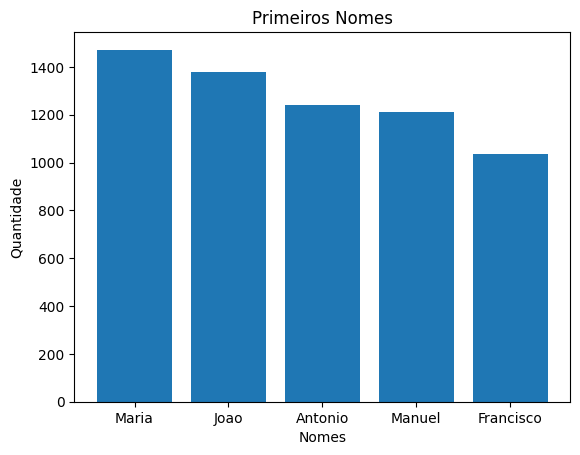

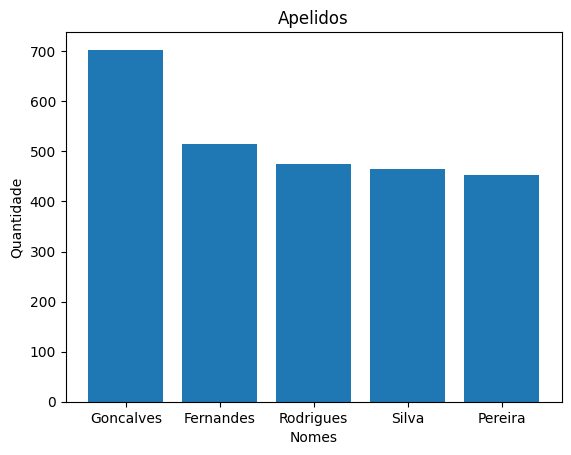

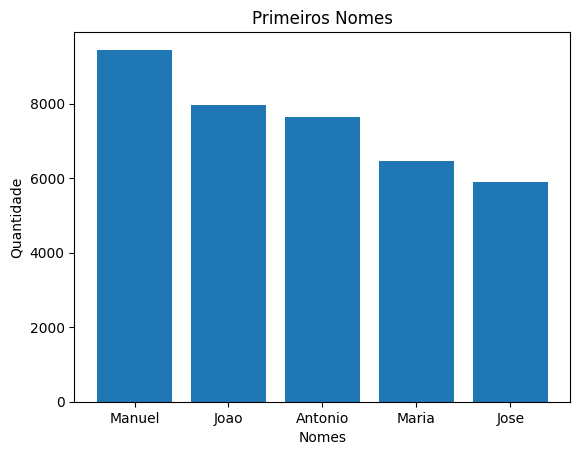

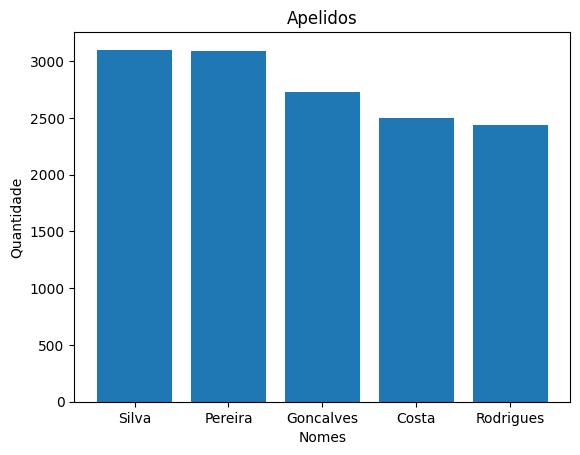

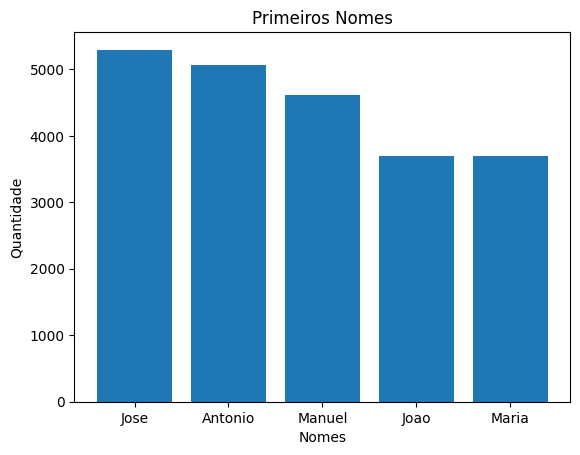

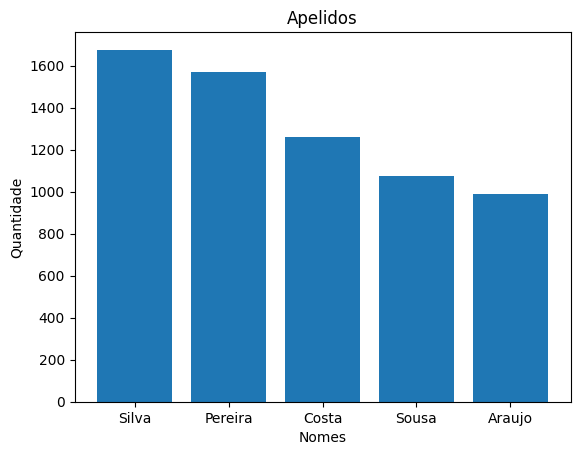

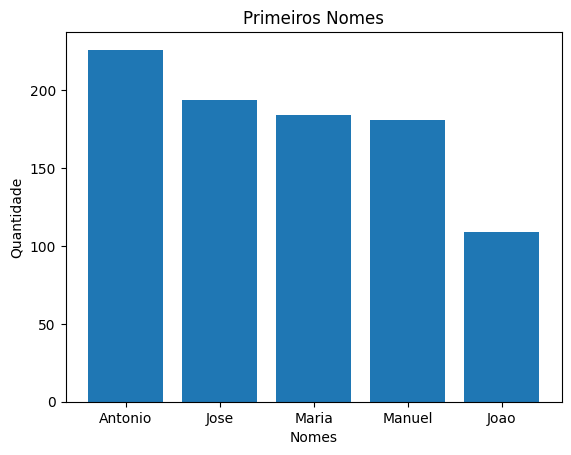

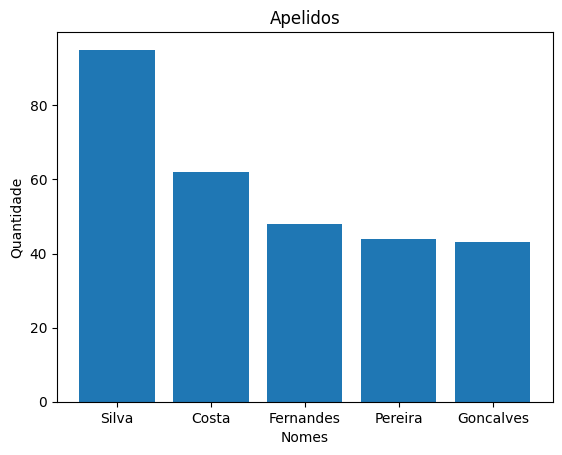

In [2]:
import re 
import menu

f = open ("processos.txt", "r")

linha = f.readline()

erNome = re.compile(r"(?P<primeiroNome>[A-Z][a-z]+) ([A-Z][a-z]+\s)*(?P<apelido>[A-Z][a-z]+)(::|,| e)")
erSeculo = re.compile(r"::((?P<seculo>\d{2})\d{2}-\d{2}-\d{2})")

dist = {}

linhaNr = 1



while linha:
    match1 = re.search(erSeculo, linha)
    if match1:
        seculo = str(int(match1.group('seculo'))+1)
        match2 = re.search(erNome, linha)
        if match2:
            if seculo not in dist:
                dist[seculo] = {}
                dist[seculo]['apelidos'] = {}
                dist[seculo]['nomes'] = {}
                
            allMatch = re.finditer(erNome, linha)
            
            for match in allMatch:
                primeiroNome = match['primeiroNome']
                apelido = match['apelido']
    
                if apelido in dist[seculo]['apelidos']:
                    dist[seculo]['apelidos'][apelido] += 1
                else:
                    dist[seculo]['apelidos'][apelido] = 1
                    
                if primeiroNome in dist[seculo]['nomes']:
                    dist[seculo]['nomes'][primeiroNome] += 1
                else:
                    dist[seculo]['nomes'][primeiroNome] = 1
            
    linhaNr+=1
    linha = f.readline()

f.close()


seculos = list(dist.keys())
seculos.sort(key= lambda x: int(x))
    
for seculo in seculos:
    nomesOrd = sorted(dist[seculo]['nomes'].items(), key= lambda x: x[1], reverse=True)
    apelidosOrd = sorted(dist[seculo]['apelidos'].items(), key= lambda x: x[1], reverse=True)
    distNTop5 = nomesOrd[:5]
    distATop5 = apelidosOrd[:5]
    menu.printPlot(dict(distNTop5),"Século " + seculo,"Primeiros Nomes","Nomes","Quantidade", False)
    menu.printPlot(dict(distATop5), "Século " + seculo,"Apelidos", "Nomes","Quantidade", False)
    input("Pressione enter para continuar...")
    menu.clear()
        


> c) Calcula a frequência dos vários tipos de relação: irmão, sobrinho, etc. (ficheiro tpc3c.py);

In [3]:
import re 
import menu

f = open ("processos.txt", "r")

linha = f.readline()

er = re.compile(r",(?P<relacao>[A-Z][a-z]+(\s[A-Z][a-z]+)*)[^\.,]*\. P")

dist = {}
i=1
while linha:
    match = re.search(er, linha)
    if match:
        allMatch = re.finditer(er, linha)
        for match1 in allMatch:
            relacao = match1['relacao']
            if relacao in dist:
                dist[relacao] += 1
            else:
                dist[relacao] = 1

    linha = f.readline()
    i+=1
   
menu.printDistribuicao(dist,"Distribuição de relações",False) 

Distribuição de relações

Valor                          Quantidade      Frequência
Irmao                               11313         52.6235%
Tio Materno                          1786          8.3077%
Tio Paterno                          1747          8.1263%
Sobrinho Materno                     1584          7.3681%
Sobrinho Paterno                     1546          7.1914%
Primo                                 586          2.7258%
Irmaos                                544          2.5305%
Irmao Paterno                         440          2.0467%
Pai                                   439          2.0421%
Filho                                 312          1.4513%
Primo Materno                         205          0.9536%
Primo Paterno                         153          0.7117%
Tio Avo Materno                       143          0.6652%
Sobrinho Neto Materno                 138          0.6419%
Tio Avo Paterno                        92          0.4279%
Sobrinho Neto Paterno          

> d) Converta os 20 primeiros registos num novo ficheiro de output mas em formato **Json** (ficheiro tpc3d.py). 